In [1]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
WORKSPACE_PATH  = os.environ['WORKSPACE_PATH']
plt.style.use(WORKSPACE_PATH+'/ROMNet/romnet/extra/postprocessing/presentation.mplstyle')

from numpy import diff

In [2]:
OutputDir  = WORKSPACE_PATH+'/ROMNet/Data/PSR_10Cases/'
TestDir    = WORKSPACE_PATH+'/ROMNet/Data/PSR_10Cases_Test/'

CasesVec   = [0]#[0,2,4,6,8]
DirDir     = OutputDir #OutputDir #TestDir

NVarsRed   = 3
InputVars  = ['log10(Rest)']
for i in range(NVarsRed):
    InputVars.append('PC_'+str(i+1))

In [3]:
RestVec = pd.read_csv(OutputDir+'/orig_data/ResidenceTimes.csv', header=None).to_numpy()

In [4]:
# fig  = plt.figure(figsize=(16,12))
# for i in range(100):
#     Data1 = pd.read_csv(OutputDir+'/orig_data/y.csv.'+str(i+1))
    
#     plt.plot(Data1.t, Data1.HH, label='t = '+"{:.2e}".format(RestVec[i,0])+' s')
    
#     plt.xlabel('t')
#     plt.ylabel(r'$Enthalpy [J]$')
#     plt.legend()
#     plt.xscale('log')

In [5]:
# fig  = plt.figure(figsize=(16,12))
# for i in range(60):
#     Data1 = pd.read_csv(OutputDir+'/orig_data/y.csv.'+str(i+1))
    
#     plt.plot(Data1.t, Data1.CO, label='t = '+"{:.2e}".format(RestVec[i,0])+' s')
    
#     plt.xlabel('t')
#     plt.ylabel(r'$m_{CO}$')
#     plt.legend()
#     plt.xscale('log')

y0_pca =  [ 3.42441839e+02 -1.78877349e-02  2.89325323e-03]


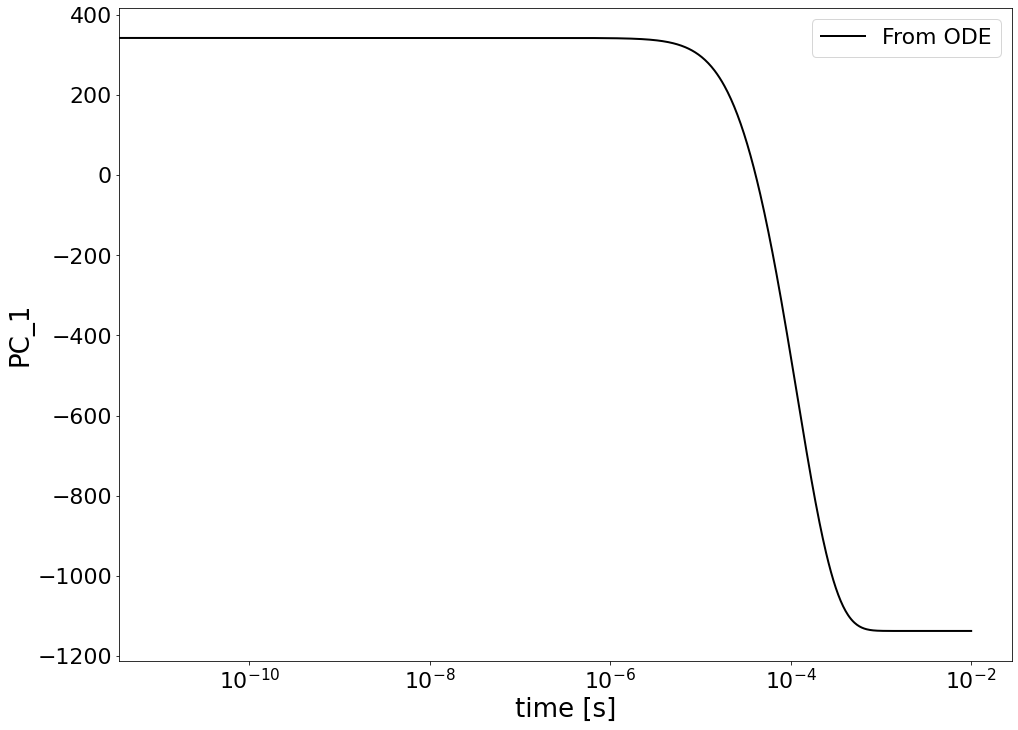

In [6]:
### Evaluating on Test Data

FileName       = DirDir + '/orig_data/RestVecTot.csv'
Data           = pd.read_csv(FileName, header=None)
RestValVecTest = np.log10(Data.to_numpy())

iPC = 0

fig = plt.figure(figsize=(16,12))
for iTest in CasesVec:
    RestVal                      = RestValVecTest[iTest]

    FileName                     = DirDir+'/pc_data_'+str(NVarsRed)+'/PC.csv.'+str(iTest+1)
    InputDataTest                = pd.read_csv(FileName, header=0)
    tVec                         = InputDataTest['t'].to_numpy()
    InputDataTest['log10(Rest)'] = RestVal * np.ones(len(tVec))
    yMat_pca                     = InputDataTest[InputVars].to_numpy()[:,1:]
    y0_pca                       = yMat_pca[0,:]
    print('y0_pca = ', y0_pca)
    
    plt.plot(tVec, yMat_pca[:,iPC], '-k', label='From ODE', lw=2)

plt.xscale('log')
plt.xlabel('time [s]')
plt.ylabel('PC_'+str(iPC+1))
plt.legend()

In [7]:
FileName = OutputDir+'/pca_'+str(NVarsRed)+'/A.csv'
A        = pd.read_csv(FileName, delimiter=',', header=None).to_numpy()

FileName = OutputDir+'/pca_'+str(NVarsRed)+'/C.csv'
C        = pd.read_csv(FileName, delimiter=',', header=None).to_numpy()

FileName = OutputDir+'/pca_'+str(NVarsRed)+'/D.csv'
D        = pd.read_csv(FileName, delimiter=',', header=None).to_numpy()

In [8]:
yMat_    = (yMat_pca.dot(A))*D[:,0] + C[:,0]

iVar =  15


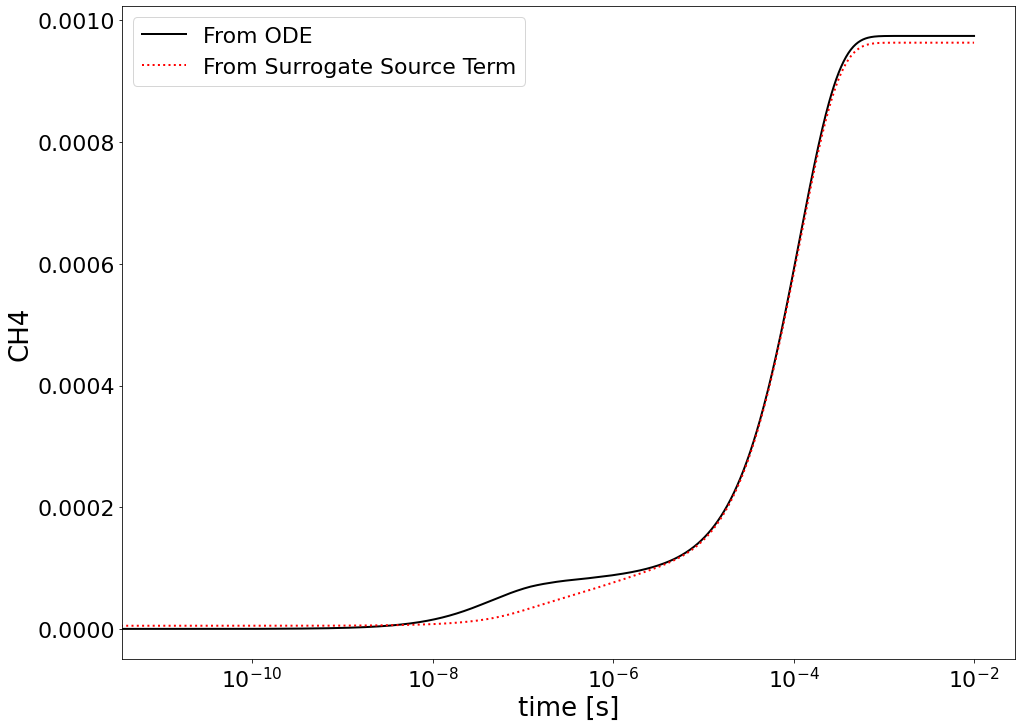

In [9]:
FileName = DirDir + '/orig_data/y.csv.1'
Data     = pd.read_csv(FileName, header=0)
VarNames = list(Data.columns)

VarOI    = 'CH4'
for iVar in range(1,len(VarNames)):
    if (VarNames[iVar] == VarOI):
        print('iVar = ', iVar)
        break
        
fig = plt.figure(figsize=(16,12))
for iTest in CasesVec:

    FileName     = DirDir + '/orig_data/y.csv.'+str(iTest+1)
    Data         = pd.read_csv(FileName, header=0)
    tVec         = Data.to_numpy()[:,0]
    yMat         = Data.to_numpy()[:,1:]
        
    plt.plot(tVec, yMat[:,iVar-1],  '-k', label='From ODE',                   lw=2)
    plt.plot(tVec, yMat_[:,iVar-1], ':r', label='From Surrogate Source Term', lw=2)

plt.xscale('log')
plt.xlabel('time [s]')
plt.ylabel(VarOI)
plt.legend()